In [14]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [15]:
def load_and_set_data():
    '''
    loads and sets to data to have only 2&3
    :return:
    '''
    number_to_claas = [2,3]
    train = pd.read_csv('train.txt', header=None, delimiter=r"\s+")
    test = pd.read_csv('test.txt', header=None, delimiter=r"\s+")
    train = train[train[0].isin(number_to_claas)].reset_index(drop=True)
    test = test[test[0].isin(number_to_claas)].reset_index(drop=True)
    return train, test

def set_train_test(train, test):
    '''
    set the vectors X & Y for train and test
    :param train:
    :param test:
    :return:
    '''
    x_train = train.drop(train.columns[0], axis=1)
    x_test = test.drop(test.columns[0], axis=1)

    y_train = train[0]
    y_train[y_train == 3] = 1
    y_train[y_train == 2] = -1

    y_test = test[0]
    y_test[y_test == 3] = 1
    y_test[y_test == 2] = -1

    print('X Train data Shape: {}'.format(x_train.shape))
    print('X Test data Shape: {}'.format(x_test.shape))
    print('Y Train data Shape: {}'.format(y_train.shape))
    print('Y Test data Shape: {}'.format(y_test.shape))

    return x_train, x_test, y_train, y_test


def plot_some_number(ind_list=(1,400)):
    '''
    plot some numbers
    :param ind_list:
    :return:
    '''
    for i in ind_list:
        img = x_train.iloc[i].as_matrix()
        img = img.reshape((16, 16))
        plt.imshow(img, cmap='gray')
        plt.title(y_train.iloc[i])
        plt.show()
def culc_med(n,p):
    d = (1 - (1/2) ** (1/n)) ** (1/p)
    return d

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Q2" data-toc-modified-id="Q2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q2</a></span></li><li><span><a href="#Q3" data-toc-modified-id="Q3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q3</a></span><ul class="toc-item"><li><span><a href="#General-Info" data-toc-modified-id="General-Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General Info</a></span></li><li><span><a href="#Training-a-Linear-Regression" data-toc-modified-id="Training-a-Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training a Linear Regression</a></span></li><li><span><a href="#Training-a-KNN" data-toc-modified-id="Training-a-KNN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training a KNN</a></span></li></ul></li></ul></div>

## Q2

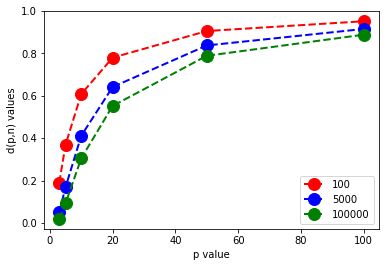

In [16]:
n = [100, 5000, 100000]
colors = ['r', 'b', 'g']
p = [3, 5, 10, 20, 50, 100]
d = {}

for i,color in zip(n,colors):
    d[i] = []
    for j in p:
        d[i].append(culc_med(i,j))
    plt.plot(p, d[i], color=color, marker='o', linestyle='dashed',linewidth = 2, markersize = 12, label=i)

plt.xlabel('p value')
plt.ylabel('d(p,n) values')
plt.legend()
plt.show()

## Q3

### General Info

X Train data Shape: (1389, 256)
X Test data Shape: (364, 256)
Y Train data Shape: (1389,)
Y Test data Shape: (364,)


Plot some Pics


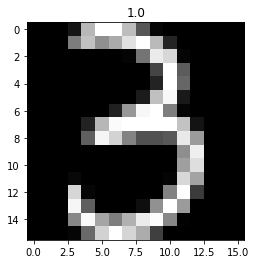

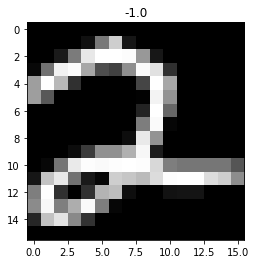

In [17]:
# load in the data
train, test = load_and_set_data()

# set train and test vectors
x_train, x_test, y_train, y_test = set_train_test(train, test)
print('\n')
print('Plot some Pics')
plot_some_number()

### Training a Linear Regression

In [18]:
clf_reg = linear_model.LinearRegression(fit_intercept=False)
clf_reg.fit(x_train, y_train)
print('Starting to Predict')
preds_train = clf_reg.predict(x_train)
preds_test = clf_reg.predict(x_test)

mse_train_reg = np.mean((preds_train - y_train) ** 2)
mse_test_reg = np.mean((preds_test - y_test) ** 2)

print('MSE on train is: {}'.format(mse_train_reg))
print('MSE on test is: {}'.format(mse_test_reg))

preds_train[preds_train >= 0] = 1
preds_train[preds_train < 0] = -1
preds_test[preds_test >= 0] = 1
preds_test[preds_test < 0] = -1

train_error = 1 - (sum(preds_train == y_train) / len(y_train))
test_error = 1 - (sum(preds_test == y_test) / len(y_test))

print('Training % of misclassified pics on linear regression {}'.format(train_error))
print('Test % of misclassified pics on linear regression {}'.format(test_error))


Starting to Predict
MSE on train is: 0.09925047911387551
MSE on test is: 0.21837749423447964
Training % of misclassified pics on linear regression 0.005759539236861011
Test % of misclassified pics on linear regression 0.038461538461538436


### Training a KNN

In [19]:
error_train = []
mse_train = []
error_test = []
mse_test = []

# Calculating error for K values (1, 3, 5, 7, 15)
for i in (1, 3, 5, 7, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_reg = KNeighborsRegressor(n_neighbors=i)

    knn.fit(x_train, y_train)
    knn_reg.fit(x_train, y_train)

    pred_i_train = knn.predict(x_train)
    pred_i_test = knn.predict(x_test)

    pred_mean_i_train = knn_reg.predict(x_train)
    pred_mean_i_test = knn_reg.predict(x_test)

    error_train.append((1 - (sum(pred_i_train == y_train) / len(y_train))) * 100)
    mse_train.append(np.mean((pred_mean_i_train - y_train) ** 2))
    error_test.append((1 - (sum(pred_i_test == y_test) / len(y_test))) * 100)
    mse_test.append(np.mean((pred_mean_i_test - y_test) ** 2))

    print('For K = {}, MSE on Train data = {}, % of misclassified pics on Train data = {}'.format(i,
                                                                                                  mse_train[-1],
                                                                                                  error_train[-1]))
    print('For K = {}, MSE on Test data = {}, % of misclassified pics on Test data = {}'.format(i,
                                                                                                  mse_test[-1],
                                                                                                  error_test[-1]))
    print('\n')


For K = 1, MSE on Train data = 0.0, % of misclassified pics on Train data = 0.0
For K = 1, MSE on Test data = 0.0989010989010989, % of misclassified pics on Test data = 2.472527472527475


For K = 3, MSE on Train data = 0.014078873690104793, % of misclassified pics on Train data = 0.5039596832253412
For K = 3, MSE on Test data = 0.09157509157509158, % of misclassified pics on Test data = 3.0219780219780223


For K = 5, MSE on Train data = 0.018430525557955366, % of misclassified pics on Train data = 0.5759539236861011
For K = 5, MSE on Test data = 0.09142857142857143, % of misclassified pics on Test data = 3.0219780219780223


For K = 7, MSE on Train data = 0.021510115925419845, % of misclassified pics on Train data = 0.6479481641468721
For K = 7, MSE on Test data = 0.09419152276295135, % of misclassified pics on Test data = 3.296703296703296


For K = 15, MSE on Train data = 0.03335413166946645, % of misclassified pics on Train data = 0.9359251259899226
For K = 15, MSE on Test data = 

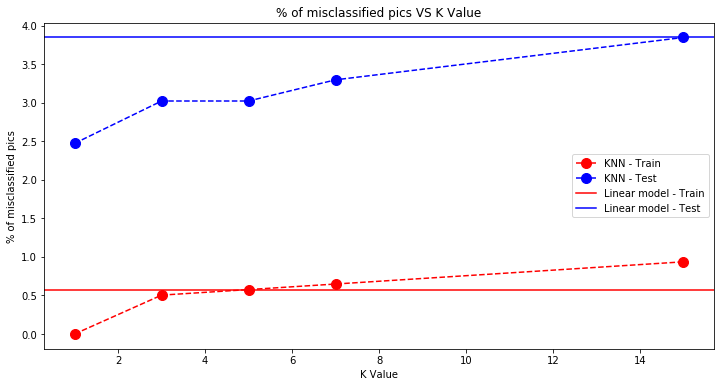

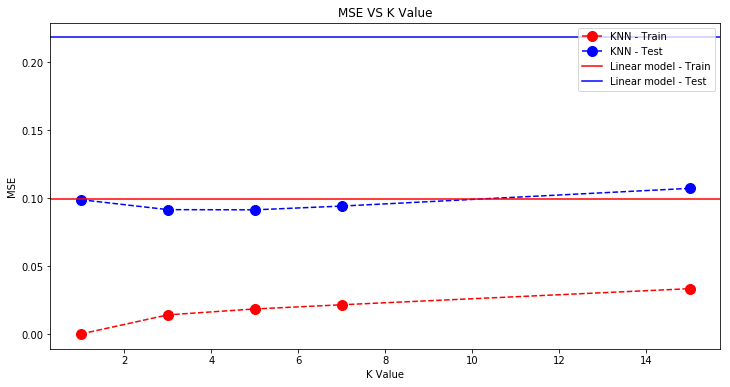

In [20]:
plt.figure(figsize=(12, 6))
plt.plot((1, 3, 5, 7, 15), error_train, color='red', linestyle='dashed', marker='o',markerfacecolor='red',
         markersize=10,label='KNN - Train')
plt.plot((1, 3, 5, 7, 15), error_test, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue',
         markersize=10,label='KNN - Test')

plt.axhline(train_error * 100, color='red',label='Linear model - Train')
plt.axhline(test_error * 100, color='blue',label='Linear model - Test')

plt.title('% of misclassified pics VS K Value')
plt.xlabel('K Value')
plt.ylabel('% of misclassified pics')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot((1, 3, 5, 7, 15), mse_train, color='red', linestyle='dashed', marker='o',markerfacecolor='red',
         markersize=10,label='KNN - Train')
plt.plot((1, 3, 5, 7, 15), mse_test, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue',
         markersize=10,label='KNN - Test')

plt.axhline(mse_train_reg, color='red',label='Linear model - Train')
plt.axhline(mse_test_reg, color='blue',label='Linear model - Test')

plt.title('MSE VS K Value')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.legend()
plt.show()